<p style="font-size:11px;"><em><strong>Créditos</strong>: El contenido de este cuaderno ha sido tomado de varias fuentes, pero especialmente de <a href="https://en.wikipedia.org/wiki/Cartography">Wikipedia</a>. El compilador se disculpa por cualquier omisión involuntaria y estaría encantado de agregar un reconocimiento.</em></p>

# El arte de hacer mapas

**Cartografiar** es el arte y ciencia de hacer mapas.

El proceso cartográfico abarca muchas etapas, desde la concepción de la necesidad de un mapa hasta su consumo por parte de una audiencia. La concepción comienza con un entorno real o imaginado. A medida que el cartógrafo recopila información sobre el tema, considera cómo está estructurada esa información y cómo esa estructura debe influir en el diseño del mapa. Luego, los cartógrafos experimentan con la generalización, la simbolización, la tipografía y otros elementos del mapa para encontrar formas de presentar la información de manera que el lector del mapa la interprete tal como se pretende. Guiado por estos experimentos, el cartógrafo se decide por un diseño y crea el mapa, ya sea en forma física o electrónica. Una vez terminado, el mapa se entrega a su audiencia. El lector del mapa interpreta los símbolos y patrones para sacar conclusiones y, tal vez, tomar acciones. A través de las perspectivas espaciales que proporcionan, los mapas ayudan a moldear nuestra visión del mundo.

El diseño de un mapa implica reunir varios elementos y tomar muchas decisiones. Los elementos del diseño se dividen en varios temas amplios, cada uno con su propia teoría, agenda de investigación y mejores prácticas. Dicho esto, hay efectos sinérgicos entre estos elementos, lo que significa que el proceso de diseño general no implica trabajar en cada elemento uno a la vez, sino un proceso iterativo de retroalimentación ajustando cada uno para lograr el resultado deseado.

**Proyecciones de mapas**: La base del mapa es el plano en el que se apoya (ya sea papel o pantalla), pero se requieren proyecciones para aplanar la superficie de la Tierra. Aunque todas las proyecciones distorsionan la superficie, los cartógrafos controlan estratégicamente cómo y dónde ocurre la distorsión. Por ejemplo, la popular proyección de Mercator no distorsiona los ángulos en la superficie, pero hace que las regiones cercanas a los polos parezcan más grandes de lo que son.

**Generalización**: Todos los mapas deben dibujarse a una escala más pequeña que la realidad, lo que requiere que la información incluida en un mapa sea una pequeña muestra de la vasta información sobre un lugar. La generalización es el proceso de ajustar el nivel de detalle en la información geográfica para que sea apropiado para la escala y el propósito de un mapa, a través de procedimientos como la selección, simplificación y clasificación.

**Simbología**: Todo mapa representa visualmente la ubicación y las propiedades de los fenómenos geográficos utilizando símbolos cartográficos, que son representaciones gráficas compuestas de varias variables visuales, como tamaño, forma, color y patrón.

**Composición**: A medida que se reúnen todos los símbolos, sus interacciones tienen efectos importantes en la lectura del mapa, como el agrupamiento y la jerarquía visual.



## Geoservicios
Los geoservicios permiten el intercambio y acceso a la información geográfica publicada por los organismos o entidades productoras de información georreferenciada. Para la publicación de geoservicios se utilizan los lenguajes y protocolos estándar definidos por el **Open Geospatial Consortium (OGC)**. El OGC busca la definición de estándares abiertos e interoperables dentro de los Sistemas de Información Geográfica (SIG) y de la World Wide Web (WWW), todo ello con el objetivo de facilitar el intercambio de información geográfica.

Entre los estándares de geoservicios más populares se tienen los siguientes:

- **WMTS** (Web Map Tile Service): Es un estándar optimizado para la visualización eficiente de mapas a través de internet.	Entrega teselas de mapas pre-renderizadas, generalmente en formatos como PNG o JPEG. En lugar de renderizar la vista completa del mapa en tiempo real como lo hace WMS, WMTS utiliza teselas pre-generadas para componer rápidamente una vista de mapa basada en las operaciones de zoom y desplazamiento del usuario. El uso de WMTS es más adecuado para aplicaciones que requieren una navegación y visualización de mapas rápida, donde los datos son relativamente estáticos y no necesitan actualizaciones frecuentes.

<img src="https://web-mapping.surge.sh/images/tile_zoom_levels.png" width="600">
		


- **WMS** (Web Map Service): Estándar para la visualización de mapas a través de internet. En este caso un mapa no consiste en los propios datos, sino en una imagen de los mismos. WMS entrega imágenes de mapas renderizadas (como PNG, JPEG) basadas en datos geográficos. Esto significa que convierte nuestros datos geoespaciales en una imagen de mapa que los usuarios pueden ver, pero con la que no pueden interactuar en términos de manipulación de datos. El uso de WMS es ideal cuando el requisito principal es mostrar una representación visual de los datos geográficos sin necesidad de interactuar con sus elementos individuales.	

A continuacion se presenta un ejemplo de servicios de consultas de WMS.

In [1]:
from owslib.wms import WebMapService
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests

wms_url = "https://ows.terrestris.de/osm/service?"

# Conexión al servicio WMS
wms = WebMapService(wms_url, version='1.3.0')

# Ver las capas disponibles en el servicio WMS
print(list(wms.contents))

['OSM-WMS', 'OSM-WMS-no-labels', 'OSM-Overlay-WMS', 'TOPO-WMS', 'TOPO-OSM-WMS', 'SRTM30-Hillshade', 'SRTM30-Colored', 'SRTM30-Colored-Hillshade', 'SRTM30-Contour', 'Dark', 'HikeMap']


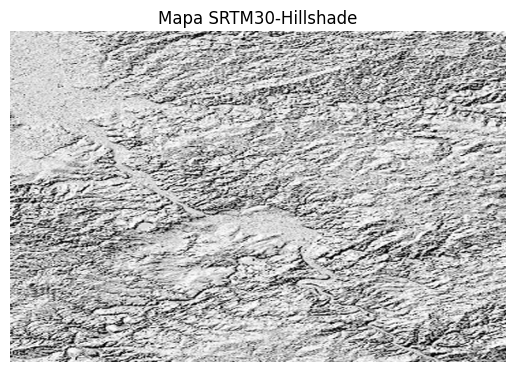

In [2]:
# Especificar las propiedades del mapa (capa, bounding box, tamaño, etc.)
layer = 'SRTM30-Hillshade'
bbox = (7.0, 50.0, 8.0, 51.0)  # Bounding box: (minX, minY, maxX, maxY)
width, height = 600, 400
srs = 'EPSG:4326'

# Solicitud de mapa usando GetMap
img = wms.getmap(
    layers=[layer],
    srs=srs,
    bbox=bbox,
    size=(width, height),
    format='image/png',
    transparent=True
)

# Abrir la imagen y mostrarla
image = Image.open(BytesIO(img.read()))
plt.imshow(image)
plt.title('Mapa SRTM30-Hillshade')
plt.axis('off')  # Ocultar los ejes
plt.show()

- **WFS** (Web Feature Service): Estándar que permite la descarga de datos geográficos en formato vectorial. WFS ofrece acceso a datos vectoriales geográficos en bruto (como puntos, polilíneas, polígonos). Esto significa que los usuarios pueden interactuar, consultar e incluso modificar directamente tanto los datos espaciales como los atributos. El uso de WFS es ideal para escenarios donde los usuarios necesitan interactuar directamente con los datos geoespaciales y, posiblemente, editarlos.

In [3]:
from owslib.wfs import WebFeatureService

wfs_url = 'https://pavics.ouranos.ca/geoserver/wfs'  # TEST_USE_PROD_DATA

# Connect to GeoServer WFS service.
wfs = WebFeatureService(wfs_url, version='2.0.0')

print(list(wfs.contents))

['public:CANOPEX_5797_basinBoundaries', 'public:CANVEC_hydro_waterbodies', 'public:canada_admin_boundaries', 'public:CanVec_Rivers', 'public:CanVec_WaterBodies', 'public:global_admin_boundaries', 'public:HydroLAKES_points', 'public:HydroLAKES_poly', 'TravisTest:NE_Admin_Level0', 'public:ne_10m_populated_places', 'TravisTest:mrc_poly', 'TravisTest:region_admin_poly', 'public:wshed_bound_n1', 'public:wshed_bound_n2', 'public:wshed_bound_n3', 'public:quebec_admin_boundaries', 'public:quebec_health_regions', 'public:quebec_mrc_boundaries', 'public:quebec_muni_boundaries', 'public:usa_admin_boundaries', 'public:USGS_HydroBASINS_lake_ar_lev12', 'public:USGS_HydroBASINS_lake_na_lev12', 'public:decamillenial_flood_CC', 'public:gaspesie_mrc', 'public:routing_1kmLakes_07', 'public:routing_1kmLakes_08', 'public:routing_1kmLakes_09', 'public:routing_1kmLakes_10', 'public:routing_1kmLakes_11', 'public:routing_1kmLakes_12', 'public:routing_allLakes_07', 'public:routing_allLakes_08', 'public:routing_

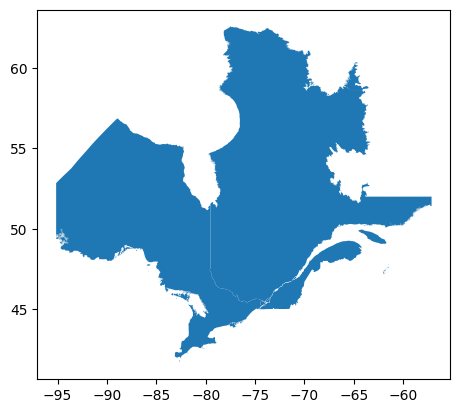

In [4]:
# Get the actual data
import geopandas as gpd

data = wfs.getfeature(typename='public:canada_admin_boundaries', bbox=(-74.5, 45.2, -73, 46), outputFormat='JSON')

# Write to file
fn = 'output.geojson'
with open(fn, 'wb') as fh:
    fh.write(data.read())

layers = gpd.read_file('output.geojson')
layers.plot();

- **WCS** (Web Coverage Service): WCS proporciona acceso a datos ráster geoespaciales en bruto. A diferencia de WMS, que solo devuelve imágenes de datos, WCS devuelve los datos en bruto que representan los valores reales subyacentes de un conjunto de datos ráster. El uso de WCS es ideal cuando los usuarios necesitan los valores reales de los píxeles de un conjunto de datos ráster. Esto es importante para tareas científicas, analíticas y de modelado donde los datos en bruto, en lugar de la representación visual, son esenciales.



- **WPS** (Web Processing Service): WPS permite la ejecución de procesos geoespaciales en el lado del servidor. Esto significa que, en lugar de solo recuperar o mostrar datos, los usuarios pueden realizar varias operaciones sobre esos datos, como análisis de buffer, intersección, unión, etc. El uso de WPS es esencial cuando se requieren cálculos geoespaciales en tiempo real, aprovechando las capacidades de procesamiento del lado del servidor.

Otra forma de acceder a datos espaciales es a través de las API (*Aplication Program Interface*). A continuación se presenta un ejemplo para acceder a los datos de sismos del Servicio Geológico de los Estados Unidos (USGS).

In [5]:
#Boundary for PR region
minlat = '0'
maxlat = '12'
minlon = '-78'
maxlon = '-74'

#date ranges 
sd = '2020-01-01T00:00:00'
ed = '2020-02-10T23:59:59'

#url 
url = ('https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&minlatitude='+ 
      minlat +'&maxlatitude='+ maxlat + '&minlongitude=' + minlon + '&maxlongitude=' + 
      maxlon + '&starttime=' + sd + '&endtime='+ ed)

#extract data
req = requests.get(url)
eq_data = req.json()

print(url)

eq_data

https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&minlatitude=0&maxlatitude=12&minlongitude=-78&maxlongitude=-74&starttime=2020-01-01T00:00:00&endtime=2020-02-10T23:59:59


{'type': 'FeatureCollection',
 'metadata': {'generated': 1749931022000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&minlatitude=0&maxlatitude=12&minlongitude=-78&maxlongitude=-74&starttime=2020-01-01T00:00:00&endtime=2020-02-10T23:59:59',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.14.1',
  'count': 1},
 'features': [{'type': 'Feature',
   'properties': {'mag': 4.3,
    'place': '6 km SSW of Zarzal, Colombia',
    'time': 1578232071979,
    'updated': 1584810807040,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us600079ay',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us600079ay&format=geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'reviewed',
    'tsunami': 0,
    'sig': 284,
    'net': 'us',
    'code': '600079ay',
    'ids': ',us600079ay,',
    'sources': ',us,',
    'types': ',origin,phase-data,',
    'nst': None,
    'dmin': 1.845

Existen librerías en Python que permiten descargar información espacial de OSM (Open Street Map). A continuación se presenta un ejemplo.

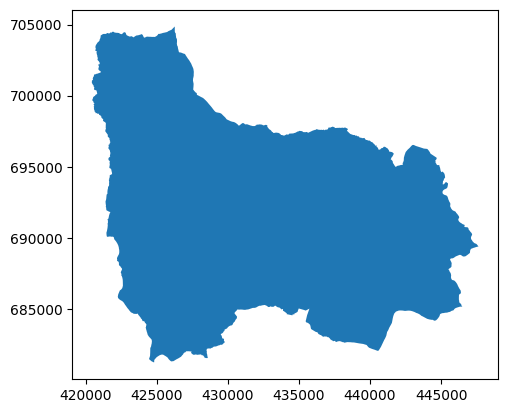

In [6]:
import osmnx as ox

city = ox.geocode_to_gdf('Medellín, Colombia')

ax = ox.project_gdf(city).plot()

In [7]:
G = ox.graph_from_place('Medellín, Colombia', network_type='drive')

ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color='y', edge_linewidth=0.2)

KeyboardInterrupt: 

In [6]:
# get all the parks in some neighborhood
place = 'Medellín, Colombia'
tags = {'leisure': 'park'}

gdf = ox.geometries_from_place(place, tags)

gdf.head()

C:\Users\edier\AppData\Local\Temp\ipykernel_23456\2936818273.py:5: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place, tags)


highway                   geometry natural access  \
element_type osmid                                                          
node         3698821056     NaN  POINT (-75.59778 6.21592)     NaN    NaN   
             3748104496     NaN  POINT (-75.53658 6.29701)     NaN    NaN   
             3799873281     NaN  POINT (-75.53896 6.29658)     NaN    NaN   
             4177131411     NaN  POINT (-75.54495 6.29082)     NaN    NaN   
             4332335637     NaN  POINT (-75.53806 6.29519)     NaN    NaN   

                        leisure                  name     description name:en  \
element_type osmid                                                              
node         3698821056    park  Canalización La Mota             NaN     NaN   
             3748104496    park                parque             NaN     NaN   
             3799873281    park                   NaN             NaN     NaN   
             4177131411    park   Parque De La Cancha             NaN     NaN   
             4332335637    park                   NaN  arbol de guama     NaN   

                        opening_hours tourism  ... surface  \
element_type osmid                             ...           
node         3698821056           NaN     NaN  ...     NaN   
             3748104496           NaN     NaN  ...     NaN   
             3799873281           NaN     NaN  ...     NaN   
             4177131411           NaN     NaN  ...     NaN   
             4332335637           NaN     NaN  ...     NaN   

                        opening_hours:covid19 addr:postcode phone image  \
element_type osmid                                                        
node         3698821056                   NaN           NaN   NaN   NaN   
             3748104496                   NaN           NaN   NaN   NaN   
             3799873281                   NaN           NaN   NaN   NaN   
             4177131411                   NaN           NaN   NaN   NaN   
             4332335637                   NaN           NaN   NaN   NaN   

                        wheelchair  dog ways fixme type  
element_type osmid                                       
node         3698821056        NaN  NaN  NaN   NaN  NaN  
             3748104496        NaN  NaN  NaN   NaN  NaN  
             3799873281        NaN  NaN  NaN   NaN  NaN  
             4177131411        NaN  NaN  NaN   NaN  NaN  
             4332335637        NaN  NaN  NaN   NaN  NaN  

[5 rows x 48 columns]

## Geocodificación

Se refiere a encontrar ubicaciones en la Tierra por nombre y dirección. **Geopy** es una biblioteca que proporciona implementaciones para muchos servicios diferentes en un solo paquete, por lo que los diferentes servicios tienen distintos términos de uso, cuotas, precios, bases de datos geográficas, etc. Por ejemplo: **Nominatim** es gratuito, pero ofrece límites bajos de solicitudes.

Cada servicio de geolocalización que puedas usar, como Google Maps, Bing Maps o Nominatim, tiene su propia clase en `geopy.geocoders`, lo que abstrae la API del servicio. Cada geocodificador define al menos un método `geocode` para resolver una ubicación a partir de una cadena de texto y puede definir un método `reverse`.

[Nominatim](https://nominatim.org/) es una herramienta para buscar datos de OSM (Open Street Map) por nombre y dirección y generar direcciones sintéticas de puntos OSM (geocodificación inversa). Los parámetros de interés en Nominatim:

* **Timeout** (int) - Tiempo de espera para encontrar cada consulta.
* **user_agent** (str) – Es un encabezado de solicitud HTTP que se envía con cada solicitud. Nominatim requiere que este valor se configure como el nombre de tu aplicación. El objetivo es limitar el número de solicitudes por aplicación. Ejemplo: `email=<correo válido>`. Si estás realizando un gran número de solicitudes, incluye un correo válido o incorpóralo en la cadena de `user_agent`. Esta información será confidencial y solo se utilizará para contactarte en caso de un problema. Ver más en la Política de Uso. **¡Importante! Debes usar algo distinto a `user_agent`!**
* **Query** (dict o str) – La dirección, consulta o una consulta estructurada que deseas geocodificar. Estructura: un diccionario cuyas claves pueden ser: `street=<número de casa> <nombre de la calle>`, `city`, `county`, `state`, `country`, o `postalcode`.
* **exactly_one** (bool) – Devuelve un resultado o una lista de resultados, si están disponibles.
* **language** (str) – Idioma preferido para devolver los resultados. En este caso es 'es'.
* **country_codes** (str o lista) – Limitar los resultados de búsqueda a un país específico (o una lista de países) usando el código ISO 3166-1alpha2. En este caso es 'col'.
* **featuretype** (str) – Si está presente, restringe los resultados a un cierto tipo de características. Valores permitidos: `country`, `state`, `city`, `settlement`.

A continuación se presenta un ejemplo.


In [8]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="edieraristizabal@gmail.com")

geolocator.geocode("Medellín").raw 



{'place_id': 269992877,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 1343264,
 'lat': '6.2443382',
 'lon': '-75.573553',
 'class': 'boundary',
 'type': 'administrative',
 'place_rank': 12,
 'importance': 0.6397321405273814,
 'addresstype': 'city',
 'name': 'Medellín',
 'display_name': 'Medellín, Valle de Aburrá, Antioquia, RAP del Agua y la Montaña, 0500, Colombia',
 'boundingbox': ['6.1626165', '6.3764208', '-75.7194224', '-75.4734083']}

In [9]:
geolocator.geocode('El Líbano,,Antioquia,Colombia', exactly_one=False)

[Location(El Libano, Ituango, Norte, Antioquia, RAP del Agua y la Montaña, 052050, Colombia, (7.0991049, -75.73034, 0.0)),
 Location(El Libano, Remedios, Nordeste, Antioquia, RAP del Agua y la Montaña, Colombia, (7.0145933, -74.6353484, 0.0))]

In [10]:
geolocator.geocode("carrera 11 #82 - 71, Bogotá, Colombia")

Location(Carrera 11, El Otoño, UPZs de Bogotá, Localidad Usaquén, Bogotá, Bogotá Distrito Capital - Municipio, RAP (Especial) Central, 110141, Colombia, (4.7622591, -74.0328838, 0.0))

In [11]:
geolocator.reverse("4.5640547, -74.1102259")

Location(Carrera 11, Carmen del Sol, UPZs de Bogotá, Localidad Rafael Uribe Uribe, Bogotá, Bogotá, Distrito Capital, RAP (Especial) Central, 111821, Colombia, (4.564083059375057, -74.11024433679462, 0.0))

## Mapas interactivos

Actualmente existen una serie de herramientas en Python y otros lenguajes que permiten elaborar mapas que interactúan con el usuario. Hay una gran cantidad de librerías para esto. A continuación se presentan algunas de las más importantes.

In [14]:
import folium

folium.Map(location = [4.664827, -76.516], zoom_start = 6)

folium.Map(width=550,height=350,location= [4.665, -76.516], zoom_start = 6, tiles = 'Stamen Terrain')

my_map=folium.Map(location= [4.665, -76.516], zoom_start = 6)
folium.TileLayer('CartoDB Positron').add_to(my_map)

# other mapping code (e.g. lines, markers etc.)
folium.LayerControl().add_to(my_map)

my_map


In [16]:
m = folium.Map(location=[6.2443382, -75.573553], zoom_start=13, width='60%',height='60%')
folium.Marker([6.2443382, -75.573553], popup="<strong>Medellín</strong>", tooltip="Click me").add_to(m)
folium.Marker([6.2444000, -75.591000], icon=folium.Icon(icon="cloud", color='green')).add_to(m)
folium.Circle(radius=500, location=[6.2444000, -75.598000], color="#45ffff", fill=True, fill_color="#3186cc",weight=3).add_to(m)
m

In [17]:
m.save("index.html")

In [19]:
import pandas as pd

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data="https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json",
    name="choropleth",
    data=pd.read_csv("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv"),
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m


**GeoViews** es una biblioteca de Python diseñada para facilitar la exploración y visualización de conjuntos de datos geográficos, meteorológicos y oceanográficos, como los utilizados en investigaciones sobre clima, tiempo atmosférico y teledetección. Es especialmente útil para aquellos que trabajan con grandes cantidades de datos espaciales y desean realizar visualizaciones interactivas de mapas o análisis espaciales. GeoViews se integra bien con otras bibliotecas de Python como **HoloViews** y **Matplotlib**, lo que permite crear gráficos complejos con un mínimo de código.

Puedes obtener más información sobre GeoViews y cómo utilizarlo en su página oficial: [GeoViews](https://geoviews.org/).

La biblioteca de Python [plotly](https://plotly.com/python/) es una biblioteca de gráficos interactiva y de código abierto que admite más de 40 tipos de gráficos únicos, cubriendo una amplia gama de casos de uso en estadística, finanzas, geografía, ciencia y visualizaciones en 3D.

Construida sobre la biblioteca de JavaScript Plotly (plotly.js), plotly permite a los usuarios de Python crear visualizaciones web interactivas y atractivas que se pueden mostrar en cuadernos Jupyter, guardar como archivos HTML independientes o utilizar como parte de aplicaciones web construidas puramente en Python utilizando Dash. La biblioteca de Python plotly a veces se denomina "plotly.py" para diferenciarla de la biblioteca de JavaScript.


In [ ]:
import plotly.graph_objects as go

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2015_06_30_precipitation.csv')

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],[0.375,"rgb(0, 152, 255)"],
[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

fig = go.Figure(data=go.Scattergeo(
    lat = df['Lat'],
    lon = df['Lon'],
    text = df['Globvalue'].astype(str) + ' inches',
    marker = dict(
        color = df['Globvalue'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 0.1
        )
    )
))

fig.update_layout(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='US Precipitation 06-30-2015<br>Source: <a href="http://water.weather.gov/precip/">NOAA</a>',
)
fig.show()

In [ ]:
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Mapeo web

Un mapa web es una visualización interactiva de información geográfica, en forma de una página web, que puedes utilizar para contar historias y responder preguntas. Los mapas web son interactivos. El término interactivo implica que el usuario puede interactuar con el mapa. Esto puede significar seleccionar diferentes capas o características de datos del mapa para visualizar, acercarse a una parte específica del mapa que te interese, inspeccionar propiedades de características, editar contenido existente o enviar nuevo contenido, y mucho más.

Los mapas web son útiles para diversos propósitos, como la visualización de datos en periodismo (y en otros ámbitos), mostrar datos espaciales en tiempo real, impulsar consultas espaciales en catálogos y herramientas de búsqueda en línea, proporcionar herramientas computacionales, reportes y mapeo colaborativo.

A continuación se presenta un ejemplo en HTML de la construcción de un mapa utilizando la librería *Leaflet* en javascript.


```
<!DOCTYPE html>
<html>
<head>
    <title>Agregar contenido</title>
    <meta name="viewport" content="width=device-width,  initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
    <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
    <style>
        body {
            padding: 0;
            margin: 0;
        }
        html, body, #map {
            height: 100%;
            width: 100%;
        }
        .legend {
            font-size: 16px;
	        line-height: 24px;
	        color: #333333;
	        font-family: 'Open Sans', Helvetica, sans-serif;
	        padding: 10px 14px;
	        background-color: rgba(245,245,220,0.8) ;
	        box-shadow: 0 0 15px rgba(0,0,0,0.2);
	        border-radius: 5px;
	        max-width: 250px;
	        border: 1px solid grey;
        }
        .legend p {
	        font-size: 16px;
	        line-height: 24px;
        }
        .legend img {
	        max-width: 200px;
	        margin: auto;
	        display: block;
        }
    </style>
</head>
<body>
    <div id="map"></div>

    <script>

        // Create variable to hold map element, give initial settings to map
        var map = L.map("map", {center: [31.262218, 34.801472], zoom: 17});
        
        // Add OpenStreetMap tile layer to map element
        L.tileLayer(
            "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png", 
            {attribution: '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a>'}
        ).addTo(map);
        
        // Add point
        var pnt = L.marker([31.262218, 34.801472]).addTo(map);
        
        // Add line
        var line = L.polyline(
          [[31.262705, 34.800514], [31.262053, 34.800782]], 
          {color: "red", weight: 10}
        ).addTo(map);
        
        // Add polygon
        var pol = L.polygon(
          [
            [31.263127, 34.803668], 
            [31.262503, 34.803089], 
            [31.261733, 34.803561], 
            [31.262448, 34.804752]
          ], 
          {color: "red", fillColor: "yellow", weight: 4}
        ).addTo(map);
        
        // Add popup
        line.bindPopup(
            "This is the path from <b>our department</b>" + 
            " to the <b>library</b>."
        );
        
        // Create Leaflet Control Object for Legend
        var legend = L.control({position: "bottomleft"});
        
        // Function that runs when legend is added to map
        legend.onAdd = function(map) {
        
            // Create Div Element and Populate it with HTML
            var div = L.DomUtil.create("div", "legend");		    
            div.innerHTML = 
                '<p><b>Simple shapes in Leaflet</b></p><hr>' +
                '<p>This map shows an example of adding shapes on a Leaflet map</p>' +
                'The following shapes were added:<br>' +
                '<p><ul>' +
                '<li>A marker</li>' +
                '<li>A line</li>' +
                '<li>A polygon</li>' +
                '</ul></p>' +
                'The line layer has a <b>popup</b>. Click on the line to see it!<hr>' +
                'Created with the Leaflet library<br>' +
                '<img src="https://web-mapping.surge.sh/images/logo_leaflet.svg">';
        
            // Return the Legend div containing the HTML content
            return div;
        
        };
        
        // Add Legend to Map
        legend.addTo(map);
        
            </script>
</body>
</html>
```